<a href="https://colab.research.google.com/github/TAMIDSpiyalong/Introduction-to-Machine-Learning-for-Energy/blob/main/Lecture_4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Tokenziation and Vectorization

Text tokenization is a crucial step in NLP that involves reformatting a piece of text into smaller units called “tokens.” These tokens serve as the building blocks for text vectorization, which converts text into numerical representations (vectors) that machine learning models can work with.

## Objectives

1. Use the bag of words method to process text and compare the difference between texts.
2. Learn about TF-IDF (Term Frequency-Inverse Document Frequency) and use it to search texts.
3. Use pretrained models to vectorize texts.

## Basic Bag-of-Words (BOW)

We want to build a basic bag-of-words (BOW) representation of our corpus. You can probably do this from scratch using dictionaries and lists (and maybe that's a good exercise). Fortunately, there are robust libraries which make it easy. We can use the scikit-learn **CountVectorizer** which takes a collection of text documents and creates a matrix of token counts:<br>
https://scikit-learn.org/stable/index.html<br>

In [190]:
import spacy
from scipy import spatial
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [191]:
# A corpus of sentences.
corpus = [
  "Red Bull drops hint on F1 engine.",
  "Honda exits F1, leaving F1 partner Red Bull.",
  "Hamilton eyes record eighth F1 title.",
  "Aston Martin announces sponsor."
]

In [192]:
vectorizer = CountVectorizer()

The *fit_transform* method does two things:
1. It learns a vocabulary dictionary from the corpus.
2. It returns a matrix where each row represents a document and each column represents a token (i.e. term).<br>

In [193]:
bow = vectorizer.fit_transform(corpus)

We can take a look at the features and vocabulary dictionary. Notice the **CountVectorizer** took care of tokenization for us. It also removed punctuation and lower-cased everything.

In [194]:
vectorizer.get_feature_names_out()

array(['announces', 'aston', 'bull', 'drops', 'eighth', 'engine', 'exits',
       'eyes', 'f1', 'hamilton', 'hint', 'honda', 'leaving', 'martin',
       'on', 'partner', 'record', 'red', 'sponsor', 'title'], dtype=object)

In [195]:
pd.DataFrame(bow.toarray(), columns = vectorizer.get_feature_names_out())

,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,1,0,2,0,0,1,1,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Each scentence is represented in a row and each column corresponds to the word listed in the vocabulary. This is a very primitive way to carry information but it does its job to some level. Note the word sequence is not considered in such way of embedding.

## Cosine Similarity

Using the **spatial** package, which is a collection of spatial algorithms and data structures, we can measure how similar are these scentences to each other. To get the cosine *similarity*, we have to substract the distance from 1.<br>

In [66]:
# The cosine method expects array_like inputs, so we need to generate
# arrays from our sparse matrix.
doc1_vs_doc2 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[1].toarray()[0])
doc1_vs_doc3 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[2].toarray()[0])
doc1_vs_doc4 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[3].toarray()[0])

print(corpus)

print(f"Doc 1 vs Doc 2: {doc1_vs_doc2}")
print(f"Doc 1 vs Doc 3: {doc1_vs_doc3}")
print(f"Doc 1 vs Doc 4: {doc1_vs_doc4}")

['Red Bull drops hint on F1 engine.', 'Honda exits F1, leaving F1 partner Red Bull.', 'Hamilton eyes record eighth F1 title.', 'Aston Martin announces sponsor.']
Doc 1 vs Doc 2: 0.47809144373375745
Doc 1 vs Doc 3: 0.15430334996209194
Doc 1 vs Doc 4: 0.0


# TF-IDF


The TF-IDF (Term Frequency-Inverse Document Frequency) helps in assessing the importance of a term in a document relative to a corpus of documents. The TF score for a term $t$ in a document $d$ is calculated as the product of the term frequency

$TF(t,d)=f_{t,d}$

and the IDF

$IDF(t,D) =ln \frac{N+1}{n_t+1}+1$

where $N$ is the total number of documents and $n_t$ is the numbner of document $t$ appears in. The final TF-IDF score is expressed as:

$s_t=TF(t,d)*IDF(t,D)$

This formulation is consistent with the scikit-learn package. There are many variations of this score, e.g., with nomalization or $log_{10}$.


In the previous case, the TF-IDF score of "f1" in document 1 is equal to $1*(ln(5/4)+1)$.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
# A corpus of sentences.
corpus = [
  "Red Bull drops hint on F1 engine.",
  "Honda exits F1, leaving F1 partner Red Bull.",
  "Hamilton eyes record eighth F1 title.",
  "Aston Martin announces sponsor."
]

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(norm=None)

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print(tfidf_matrix.shape)

(4, 20)


TF-IDF scores for each term in each document

In [185]:
pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names_out())

,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
0,0.000000,0.000000,1.510826,1.916291,0.000000,1.916291,0.000000,0.000000,1.223144,0.000000,1.916291,0.000000,0.000000,0.000000,1.916291,0.000000,0.000000,1.510826,0.000000,0.000000
1,0.000000,0.000000,1.510826,0.000000,0.000000,0.000000,1.916291,0.000000,2.446287,0.000000,0.000000,1.916291,1.916291,0.000000,0.000000,1.916291,0.000000,1.510826,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000,0.000000,1.916291,1.223144,1.916291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000,0.000000,1.916291
3,1.916291,1.916291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000


In [186]:
cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

array([[0.33024164]])

In [187]:
# Calculate cosine similarity between the first document and the others
print("Cosine Similarity between first document and the others:")
for i, doc in enumerate(tfidf_matrix[1:]):
    print(f"Document {i+2}: {cosine_similarity(tfidf_matrix[0], tfidf_matrix[i+1])}")


Cosine Similarity between first document and the others:
Document 2: [[0.33024164]]
Document 3: [[0.07370387]]
Document 4: [[0.]]


## A little search engine with TF-IDF

The TF-IDF features can also be used to look up some articles, which is how roughly search engine works. This time around, rather than using a short toy corpus, let's use a larger dataset. scikit-learn has a **datasets** module with utilties to load datasets.

In [404]:
from sklearn.datasets import fetch_20newsgroups

The **datasets** module includes fetchers for each dataset in scikit-learn. For our purposes, we'll fetch only the posts from the *sci.space* topic, and skip on headers, footers, and quoting of other posts.
By default, the fetcher retrieves the *training* subset of the data only. If you don't know what that means, it'll become clear later in the course when we discuss modelling. For now, it doesn't matter for our purposes.

In [405]:
corpus = fetch_20newsgroups(categories=['sci.space'],
                            remove=('headers', 'footers', 'quotes'))

In [406]:
# Number of posts in our dataset.
len(corpus.data)

593

In [407]:
# View posts.
print(corpus.data[15])

This might a real wierd idea or maybe not..

I have seen where people have blown up ballons then sprayed material into them
that then drys and makes hard walls...

Why not do the same thing for a space station..

Fly up the docking rings and baloon materials and such, blow up the baloons,
spin then around (I know a problem in micro gravity) let them dry/cure/harden?
and cut a hole for the docking/attaching ring and bingo a space station..

Of course the ballons would have to be foil covered or someother radiation
protective covering/heat shield(?) and the material used to make the wals would
have to meet the out gasing and other specs or atleast the paint/covering of
the inner wall would have to be human safe.. Maybe a special congrete or maybe
the same material as makes caplets but with some changes (saw where someone
instea dof water put beer in the caplet mixture, got a mix that was just as
strong as congret but easier to carry around and such..)

Sorry for any spelling errors, I mi

There are many tokenization tools such as ByteLevelBPETokenizer and SpaCy. Spacy is helpful for named entity recognition (NER), part-of-speech (POS) tagging, dependency parsing, and more. ByteLevelBPETokenizer is based on the Byte-Pair Encoding (BPE) algorithm, which is a subword tokenization technique. 

In [408]:
pip install tokenizers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [409]:
from tokenizers import ByteLevelBPETokenizer

# Sample text
text = "Red Bull drops hint on F1 engine."

# Initialize ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer()

# Train tokenizer on the sample text
tokenizer.train_from_iterator([text])

# Tokenize the text
tokens = tokenizer.encode(text).tokens

# Print the tokens
print("Subword tokens:", tokens)


Subword tokens: ['R', 'e', 'd', 'Ġ', 'B', 'u', 'l', 'l', 'Ġ', 'd', 'r', 'o', 'p', 's', 'Ġ', 'h', 'in', 't', 'Ġ', 'o', 'n', 'Ġ', 'F', '1', 'Ġ', 'e', 'n', 'g', 'in', 'e', '.']


In [410]:
from spacy.lang.en import English

# Load the English language model
nlp = English()

# Define a sample sentence
sentence = "Red Bull drops hint                 on F1 engine."

# Process the sentence using SpaCy
doc = nlp(sentence)

tokens = [token.text for token in doc]

# Print the tokens
print("Tokens:", tokens)

tokens = [token.text for token in doc if not token.is_space]
tokens

Tokens: ['Red', 'Bull', 'drops', 'hint', '                ', 'on', 'F1', 'engine', '.']


['Red', 'Bull', 'drops', 'hint', 'on', 'F1', 'engine', '.']

### Creating TF-IDF features

The usage pattern is similar, but we pass a customized tokenizer to the TFIDF vectorizor to make the dataset smaller and more efficient.

In [411]:
def spacy_tokenizer(text):
    # Process the text using spaCy
    doc = nlp(text)
    # Extract tokens from the processed document
    tokens = [token.text for token in doc if not token.is_space]
    return tokens

In [412]:
%%time
# Use the default settings of TfidfVectorizer.
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
# vectorizer = TfidfVectorizer()

features = vectorizer.fit_transform(corpus.data)

CPU times: total: 1.19 s
Wall time: 1.18 s


In [413]:
len(corpus.data)

593

In [414]:
vocabulary= vectorizer.get_feature_names_out()

vocabulary[2000:2050]

array(['accomplished', 'accomplishing', 'accomplishments', 'accordance',
       'according', 'account', 'accounting', 'accounts', 'accredited',
       'accretie', 'accretieschijven', 'accretion', 'accumulate',
       'accuracy', 'accurate', 'accurately', 'acdis', 'ace', 'achieve',
       'achieved', 'achievement', 'achievements', 'achieves', 'achieving',
       'acid', 'acids', 'acknowledge', 'acknowledged', 'acm', 'acme',
       'acording', 'acquainted', 'acquiring', 'acrilic', 'acro',
       'acronym', 'acronyms', 'across', 'acrossed', 'acro{$key', 'acrv',
       'acrylonitrile', 'act', 'act:-', 'acting', 'actinide', 'action',
       'actions', 'activated', 'activation'], dtype=object)

In [415]:
# The number of unique tokens.
print(len(vocabulary))

14484


In [445]:
np.where(vocabulary == 'achieving')

(array([2023], dtype=int64),)

In [416]:
# The dimensions of our feature matrix. X rows (documents) by Y columns (tokens).
print(features.shape)

(593, 14484)


In [417]:
# What the encoding of the first document looks like in sparse format.
print(features[:10,:10].toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.12369473 0.08749726 0.
  0.         0.         0.         0.        ]
 [0.19930627 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.09824926 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.02118455 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.12280447]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.

As we mentioned, there are TF-IDF variations out there and scikit-learn, among other things, adds **smoothing** (adds a one to the numerator and denominator in the IDF component), and normalizes by default. These can be disabled if desired using the *smooth_idf* and *norm* parameters respectively. See here for more information:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


### Querying the data

The similarity measuring techniques we learned previously can be used here in the same way. In effect, we can query our data using this sequence:
1. *Transform* our query using the same vocabulary from our *fit* step on our corpus.
2. Calculate the pairwise cosine similarities between each document in our corpus and our query.
3. Sort them in descending order by score.

In [418]:
# Transform the query into a TF-IDF vector.
query = ["lunar orbit is about 27.322 days"]
query_tfidf = vectorizer.transform(query)

In [419]:
query_tfidf.shape

(1, 14484)

In [420]:
# Calculate the cosine similarities between the query and each document.
# We're calling flatten() here becaue cosine_similarity returns a list of lists and we just want a single list.
cosine_similarities = cosine_similarity(features, query_tfidf).flatten()
cosine_similarities.shape

(593,)

Now that we have our list of cosine similarities, we can use this utility function to return the indices of the top k documents with the highest cosine similarities.

In [421]:
import numpy as np

# numpy's argsort() method returns a list of *indices* that
# would sort an array:
# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
#
# The sort is ascending, but we want the largest k cosine_similarites
# at the bottom of the sort. So we negate k, and get the last k
# entries of the indices list in reverse order. There are faster
# ways to do this using things like argpartition but this is
# more succinct.
def top_k(arr, k):
  kth_largest = (k + 1) * -1
  return np.argsort(arr)[:kth_largest:-1]

In [422]:
# So for our query above, these are the top five documents.
top_related_indices = top_k(cosine_similarities, 5)
print(top_related_indices)

[249 108   0 329 312]


In [423]:
# Let's take a look at their respective cosine similarities.
print(cosine_similarities[top_related_indices])

[0.33214838 0.32070687 0.19990452 0.1510558  0.14020631]


In [424]:
# Top match.
print(corpus.data[top_related_indices[0]])


Actually, Hiten wasn't originally intended to go into lunar orbit at all,
so it indeed didn't have much fuel on hand.  The lunar-orbit mission was
an afterthought, after Hagoromo (a tiny subsatellite deployed by Hiten
during a lunar flyby) had a transmitter failure and its proper insertion
into lunar orbit couldn't be positively confirmed.

It should be noted that the technique does have disadvantages.  It takes
a long time, and you end up with a relatively inconvenient lunar orbit.
If you want something useful like a low circular polar orbit, you do have
to plan to expend a certain amount of fuel, although it is reduced from
what you'd need for the brute-force approach.


In [426]:
# Second-best match.
print(corpus.data[top_related_indices[1]])


Their Hiten engineering-test mission spent a while in a highly eccentric
Earth orbit doing lunar flybys, and then was inserted into lunar orbit
using some very tricky gravity-assist-like maneuvering.  This meant that
it would crash on the Moon eventually, since there is no such thing as
a stable lunar orbit (as far as anyone knows), and I believe I recall
hearing recently that it was about to happen.


In [427]:
# Try a different query
query = ["Texas A&M University football team"]
query_tfidf = vectorizer.transform(query)

cosine_similarities = cosine_similarity(features, query_tfidf).flatten()
top_related_indices = top_k(cosine_similarities, 5)

print(top_related_indices)
print(cosine_similarities[top_related_indices])

[373 333  68 344 153]
[0.14367476 0.11035443 0.09059311 0.08404243 0.08174752]


In [428]:
print(corpus.data[top_related_indices[1]])


I don't care who told you this it is not generally true. I see EVERY single
line item on a contract and I have to sign it. There is no such thing as
wrap at this university. I also asked around here. Ther is no wrap at 
Marquette, University of Wisconsin Madison, Utah State, Weber State or
Embry Riddle U. I am not saying that it doees not happen but in every instance
that I have been able to track down it does not. Also the president of our
University who was Provost at University of West Virgina said that it did
not happen there either and that this figure must be included in the overhead
to be a legitimate charge.


I did they never heard of it but suggest that, like our president did, that
any percentage number like this is included in the overhead.


No Allen you did not. You merely repeated allegations made by an Employee
of the Overhead capital of NASA. Nothing that Reston does could not be dont
better or cheaper at the Other NASA centers  where the work is going on.
Kinda funny

So here we have the beginnings of a simple search engine but we're a far cry from competing with commercial off-the-shelf search engines, let alone Google.
<br>
- For each query, we're scanning through our entire corpus, but in practice, you'll want to create an **inverted index**. Search applications such as Elasticsearch do that under the hood.
- You'd also want to evaluate the efficacy of your search using metrics like **precision** and **recall**.
- Document ranking also tends to be more sophisticated, using different ranking functions like Okapi BM25. With major search engines, ranking also involves hundreds of variables such as what the user searched for previously, what do they tend to click on, where are they physically, and on and on. These variables are part of the "secret sauce" and are closely guarded by companies.
- Beyond word presence, intent and meaning are playing a larger role.
<br>

Information Retrieval is a huge, rich topic and beyond search, it's also key in tasks such as question-answering.

## Using Pretrained, Third-Party Vectorizors
There are a variety of pretrained, static word vector packages out there. In this section, we'll use the **Google News** vectors, a collection of three million, 300-dimension word vectors trained from three billion words from a Google News corpus (circa 2015).

In [99]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!gdown "https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku"

In [101]:
embedding_file = 'data/GoogleNews-vectors-negative300.bin.gz'

Next, we'll have **gensim** load the vectors through the **KeyedVectors** module which will enable us to look up vectors by tokens and indices.<br>
https://radimrehurek.com/gensim/models/keyedvectors.html. To save time and space, we'll limit ourselves to 200,000 word vectors for now.

In [102]:
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=200000)

In [103]:
len(word_vectors)

200000

In [116]:
pizza = word_vectors['Texas']
print(f'Vector dimension: {pizza.shape}')

# The embedding for the word 'pizza'.
print(pizza.shape)

Vector dimension: (300,)
(300,)


In [105]:
print(word_vectors.similarity('pizza', 'gorilla'))
print(word_vectors.similarity('pizza', 'tree'))
print(word_vectors.similarity('pizza', 'yoga'))
print(word_vectors.similarity('pizza', 'tomato'))
print(word_vectors.similarity('pizza', 'sauce'))
print(word_vectors.similarity('pizza', 'Texas'))

0.108518735
0.11185601
0.14119941
0.35505623
0.36959887
0.04774921


In [106]:
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())


0.5314661

Visualizing word vectors is straight-forward and can offer insights into what kind of contexts the training algorithm picked up. Because these word vectors have a dimension of 300, we need to reduce them down to two dimensions to plot them on a regular graph. This can be done through **Principal Components Analysis (PCA)**. Here, we're plotting the words we considered in the slides.

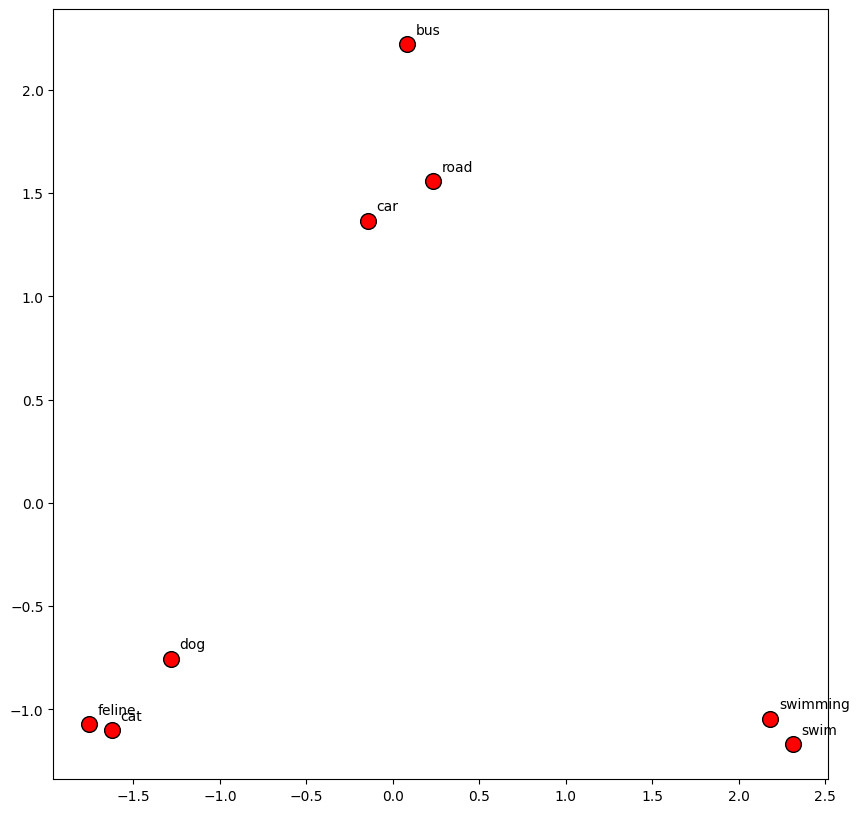

In [113]:
def display_pca_scatterplot(model, words):
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r', s=128)
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

display_pca_scatterplot(word_vectors, ['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus'])

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# We can also use t-SNE to visualize this to see if it is still true
FIXME

NameError: name 'FIXME' is not defined

## Conclustion

In this NLP lab, we delved into text tokenization and vectorization, starting with bag-of-words (BOW) representation for converting text into numerical forms using scikit-learn, then progressing to TF-IDF for assessing term importance in documents relative to a corpus. We utilized TF-IDF for text search and semantic analysis via cosine similarity metrics. Implementing a basic search engine using TF-IDF showcased practical application. Additionally, we explored pre-trained word vectors like Google News vectors, demonstrating how third-party resources can enhance NLP tasks.